### Week 4: Input-Output File + Data Pre-processing

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#### 1. Read, Write, Append, Delete Files

**Read files**

In [2]:
# Read files
path = "File_Handling/test_file.txt"
f = open(path, "r")
# s = f.readline()
s1 = f.readlines()
f.close() #closing the file ensures that these resources are released properly.
# print(s)

FileNotFoundError: [Errno 2] No such file or directory: 'File_Handling/test_file.txt'

In [ ]:
# Use with statement instead of manually calling f.close()
with open(path, "r") as file:
    # text = file.read() # Read the entire file
    # text = file.readline() # Read the first line
    text = file.readlines() # Read the file into a list of lines
print(text)

**Write OR Append to a file**

In [22]:
with open(path, "w") as f:
    # f.write("This is a new line.\n") # Overwrite the content
    f.writelines(["Line 1.\n", "Line 2.\n", "Line 3.\n"]) # Write multiple lines

In [25]:
with open(path, "a") as f: # Change the mode to append not overwrite
    f.write("New line. \n")

**Delete a file**

In [28]:
if os.path.exists(path):
    os.remove(path)
else:
    print("No such file!!")

In [ ]:
try:
    with open(path, "r") as file:
        file.read()
except FileNotFoundError as e:
    print(f"{e}")
finally:
    print("Ending!!!")

In [ ]:
try:
    with open("File_Handling/MyTextFile.txt", "w") as file:
        file.write("Newline!!")
except:
    print("No such file!!")
finally:
    print("Finished!!!!")

In [32]:
# path1 = "File_Handling/test.txt"
# with open(path1, "r") as f1:
#     f1.read()


#### 2. Using Numpy and Pandas to save files.

In [3]:
# Numpy
myarr = np.round(np.random.rand(10)+ np.random.randint(-5, 10, 10),2)
print(myarr)
np.savetxt("File_Handling/MyArray.txt", myarr, fmt="%10.2f", delimiter=",")

[-0.51  3.82  3.73 -2.11  8.45 -3.47 -0.37  3.01  3.33  7.44]


In [4]:
myarr2 = np.random.randint(-5, 10, (3,2))
print(myarr2)

[[ 2  7]
 [-1  2]
 [ 8 -3]]


In [5]:
# Pandas

table = pd.DataFrame(index=[1,2], columns=["City", "Population", "Country"])
table.iloc[1]

City          NaN
Population    NaN
Country       NaN
Name: 2, dtype: object

In [6]:
table["City"]

1    NaN
2    NaN
Name: City, dtype: object

In [7]:
# Assign a new value in table
table.loc[1, "City"] = "Paris"
table.loc[1, "Population"] = 81000000
table.loc[1, "Country"] = "France"

table.loc[2, "City"] = "London"
table.loc[2, "Population"] = 918000
table.loc[2, "Country"] = "UK"

# Show table
display(table)

,City,Population,Country
1,Paris,81000000,France
2,London,918000,UK


In [8]:
table.dtypes

City          object
Population    object
Country       object
dtype: object

In [9]:
result = table["Population"]
print(result)
print(f"The type: {type(result)}")

1    81000000
2      918000
Name: Population, dtype: object
The type: <class 'pandas.core.series.Series'>


In [10]:
table

,City,Population,Country
1,Paris,81000000,France
2,London,918000,UK


In [11]:
table.iloc[1]

City          London
Population    918000
Country           UK
Name: 2, dtype: object

In [12]:
table.loc[table["Country"] == "UK"]

,City,Population,Country
2,London,918000,UK


In [13]:
type(table)

pandas.core.frame.DataFrame

#### 3. Pre-processing data

In [15]:
df = pd.read_csv("Data/sample1.csv", delimiter=";")
df.head(3)

,Order ID,Customer Name,Product Name,Quantity,Price,Date,Region
0,1,John Doe,Widget A,10,15.50,5/1/24,North
1,2,Jane Smith,Widget B,5,20.00,10/1/24,South
2,3,NaN,Widget A,10,15.50,5/1/24,North


In [16]:
df.tail(3)

,Order ID,Customer Name,Product Name,Quantity,Price,Date,Region
13,14,Alice Johnson,Widget K,3,NaN,15/2/24,West
14,15,Robert Gray,Widget L,10,25.00,NaN,South
15,16,Sarah Brown,Widget M,2,19.99,20/2/24,NORTH


In [17]:
# Info, range data, null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order ID       16 non-null     int64 
 1   Customer Name  14 non-null     object
 2   Product Name   15 non-null     object
 3   Quantity       14 non-null     object
 4   Price          14 non-null     object
 5   Date           15 non-null     object
 6   Region         16 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.0+ KB


In [18]:
df

,Order ID,Customer Name,Product Name,Quantity,Price,Date,Region
0,1,John Doe,Widget A,10,15.50,5/1/24,North
1,2,Jane Smith,Widget B,5,20.00,10/1/24,South
2,3,NaN,Widget A,10,15.50,5/1/24,North
3,4,Alice Johnson,Widget C,NaN,30.00,15/1/24,East
4,5,Crystal Lin,NaN,3,25.00,20/1/24,West
5,6,Bob Brown,Widget D,1,-10.00,25/1/24,South
6,7,Tom White,Widget E,five,40.00,30/1/24,North
7,8,Sarah Green,Widget F,4,NaN,31/1/24,South
8,9,Jim Black,Widget K,2,twenty,28/1/24,EAST
9,10,Emily Davis,Widget A,7,15.50,29/1/24,West


In [19]:
df.isnull().sum() # how many null values in each column

Order ID         0
Customer Name    2
Product Name     1
Quantity         2
Price            2
Date             1
Region           0
dtype: int64

In [20]:
df.nunique() # how many distinct values in each column

Order ID         16
Customer Name    13
Product Name     12
Quantity          9
Price            11
Date             14
Region            6
dtype: int64

*Issue 1:* The column **Customer Name** has 2 null values
- Solution: fillna by Unknown

In [21]:
df.loc[df["Customer Name"].isnull() == True]

,Order ID,Customer Name,Product Name,Quantity,Price,Date,Region
2,3,NaN,Widget A,10,15.50,5/1/24,North
12,13,NaN,Widget J,5,22.50,10/2/24,East


In [22]:
df["Customer Name"] = df["Customer Name"].fillna("Unknown")

In [23]:
display(df)
df.isnull().sum()

,Order ID,Customer Name,Product Name,Quantity,Price,Date,Region
0,1,John Doe,Widget A,10,15.50,5/1/24,North
1,2,Jane Smith,Widget B,5,20.00,10/1/24,South
2,3,Unknown,Widget A,10,15.50,5/1/24,North
3,4,Alice Johnson,Widget C,NaN,30.00,15/1/24,East
4,5,Crystal Lin,NaN,3,25.00,20/1/24,West
5,6,Bob Brown,Widget D,1,-10.00,25/1/24,South
6,7,Tom White,Widget E,five,40.00,30/1/24,North
7,8,Sarah Green,Widget F,4,NaN,31/1/24,South
8,9,Jim Black,Widget K,2,twenty,28/1/24,EAST
9,10,Emily Davis,Widget A,7,15.50,29/1/24,West


Order ID         0
Customer Name    0
Product Name     1
Quantity         2
Price            2
Date             1
Region           0
dtype: int64

In [24]:
df.dtypes

Order ID          int64
Customer Name    object
Product Name     object
Quantity         object
Price            object
Date             object
Region           object
dtype: object

*Issue 2:* The column **Date** has 1 null values
- Solution: Use ffill() method

In [25]:
df["Date"] = df["Date"].ffill()
df

,Order ID,Customer Name,Product Name,Quantity,Price,Date,Region
0,1,John Doe,Widget A,10,15.50,5/1/24,North
1,2,Jane Smith,Widget B,5,20.00,10/1/24,South
2,3,Unknown,Widget A,10,15.50,5/1/24,North
3,4,Alice Johnson,Widget C,NaN,30.00,15/1/24,East
4,5,Crystal Lin,NaN,3,25.00,20/1/24,West
5,6,Bob Brown,Widget D,1,-10.00,25/1/24,South
6,7,Tom White,Widget E,five,40.00,30/1/24,North
7,8,Sarah Green,Widget F,4,NaN,31/1/24,South
8,9,Jim Black,Widget K,2,twenty,28/1/24,EAST
9,10,Emily Davis,Widget A,7,15.50,29/1/24,West


*Issue 3* The column **Region** has inconsistent values
- East Value: East, EAST
- North Value: North, NORTH

In [26]:
df["Region"].unique() # return distinct (unique) values for a specific column

array(['North', 'South', 'East', 'West', 'EAST', 'NORTH'], dtype=object)

In [27]:
df

,Order ID,Customer Name,Product Name,Quantity,Price,Date,Region
0,1,John Doe,Widget A,10,15.50,5/1/24,North
1,2,Jane Smith,Widget B,5,20.00,10/1/24,South
2,3,Unknown,Widget A,10,15.50,5/1/24,North
3,4,Alice Johnson,Widget C,NaN,30.00,15/1/24,East
4,5,Crystal Lin,NaN,3,25.00,20/1/24,West
5,6,Bob Brown,Widget D,1,-10.00,25/1/24,South
6,7,Tom White,Widget E,five,40.00,30/1/24,North
7,8,Sarah Green,Widget F,4,NaN,31/1/24,South
8,9,Jim Black,Widget K,2,twenty,28/1/24,EAST
9,10,Emily Davis,Widget A,7,15.50,29/1/24,West


In [28]:
df["Region"] = df["Region"].replace(["East", "EAST"], "East").replace(["North", "NORTH"], "North")
# df["Region"] = df["Region"].replace(["East", "EAST"], "East")
df["Region"].unique()

array(['North', 'South', 'East', 'West'], dtype=object)

*Issue 4:* Wrong data types and values in columns **Price, Quantity**

In [47]:
df1 = df.copy()
df1

,Order ID,Customer Name,Product Name,Quantity,Price,Date,Region
0,1,John Doe,Widget A,10,15.50,5/1/24,North
1,2,Jane Smith,Widget B,5,20.00,10/1/24,South
2,3,Unknown,Widget A,10,15.50,5/1/24,North
3,4,Alice Johnson,Widget C,NaN,30.00,15/1/24,East
4,5,Crystal Lin,NaN,3,25.00,20/1/24,West
5,6,Bob Brown,Widget D,1,-10.00,25/1/24,South
6,7,Tom White,Widget E,five,40.00,30/1/24,North
7,8,Sarah Green,Widget F,4,NaN,31/1/24,South
8,9,Jim Black,Widget K,2,twenty,28/1/24,East
9,10,Emily Davis,Widget A,7,15.50,29/1/24,West


In [48]:
df1.loc[df1["Quantity"] == "five", "Quantity"] = 5
df1

,Order ID,Customer Name,Product Name,Quantity,Price,Date,Region
0,1,John Doe,Widget A,10,15.50,5/1/24,North
1,2,Jane Smith,Widget B,5,20.00,10/1/24,South
2,3,Unknown,Widget A,10,15.50,5/1/24,North
3,4,Alice Johnson,Widget C,NaN,30.00,15/1/24,East
4,5,Crystal Lin,NaN,3,25.00,20/1/24,West
5,6,Bob Brown,Widget D,1,-10.00,25/1/24,South
6,7,Tom White,Widget E,5,40.00,30/1/24,North
7,8,Sarah Green,Widget F,4,NaN,31/1/24,South
8,9,Jim Black,Widget K,2,twenty,28/1/24,East
9,10,Emily Davis,Widget A,7,15.50,29/1/24,West


In [49]:
df1.loc[df1.Price == "twenty", "Price"] = 20
df1

,Order ID,Customer Name,Product Name,Quantity,Price,Date,Region
0,1,John Doe,Widget A,10,15.50,5/1/24,North
1,2,Jane Smith,Widget B,5,20.00,10/1/24,South
2,3,Unknown,Widget A,10,15.50,5/1/24,North
3,4,Alice Johnson,Widget C,NaN,30.00,15/1/24,East
4,5,Crystal Lin,NaN,3,25.00,20/1/24,West
5,6,Bob Brown,Widget D,1,-10.00,25/1/24,South
6,7,Tom White,Widget E,5,40.00,30/1/24,North
7,8,Sarah Green,Widget F,4,NaN,31/1/24,South
8,9,Jim Black,Widget K,2,20,28/1/24,East
9,10,Emily Davis,Widget A,7,15.50,29/1/24,West


In [57]:
df1.dtypes

Order ID          int64
Customer Name    object
Product Name     object
Quantity         object
Price            object
Date             object
Region           object
dtype: object

In [61]:
df1["Quantity"]= pd.to_numeric(df1["Quantity"], errors="coerce")
df1["Price"] = pd.to_numeric(df1["Price"], errors="coerce")

In [65]:
df1.dtypes

Order ID           int64
Customer Name     object
Product Name      object
Quantity         float64
Price            float64
Date              object
Region            object
dtype: object

In [68]:
df1.loc[df1["Price"] < 0, "Price"] = abs(df1.loc[df1["Price"] < 0, "Price"])
df1

,Order ID,Customer Name,Product Name,Quantity,Price,Date,Region
0,1,John Doe,Widget A,10.0,15.50,5/1/24,North
1,2,Jane Smith,Widget B,5.0,20.00,10/1/24,South
2,3,Unknown,Widget A,10.0,15.50,5/1/24,North
3,4,Alice Johnson,Widget C,NaN,30.00,15/1/24,East
4,5,Crystal Lin,NaN,3.0,25.00,20/1/24,West
5,6,Bob Brown,Widget D,1.0,10.00,25/1/24,South
6,7,Tom White,Widget E,5.0,40.00,30/1/24,North
7,8,Sarah Green,Widget F,4.0,NaN,31/1/24,South
8,9,Jim Black,Widget K,2.0,20.00,28/1/24,East
9,10,Emily Davis,Widget A,7.0,15.50,29/1/24,West


*Issue 5:* Fillna for column **Quantity**
- Solution: fillna by mean

In [76]:
quantity_non_null = df1.loc[~df1.Quantity.isnull(), "Quantity"]
quantity_non_null

0     10.0
1      5.0
2     10.0
4      3.0
5      1.0
6      5.0
7      4.0
8      2.0
9      7.0
10     8.0
12     5.0
13     3.0
14    10.0
15     2.0
Name: Quantity, dtype: float64

In [78]:
mean_quantity = round(quantity_non_null.mean(),0)

print(mean_quantity)

5.0


In [80]:
df1["Quantity"] = df1["Quantity"].fillna(mean_quantity).astype(int)
df1

,Order ID,Customer Name,Product Name,Quantity,Price,Date,Region
0,1,John Doe,Widget A,10,15.50,5/1/24,North
1,2,Jane Smith,Widget B,5,20.00,10/1/24,South
2,3,Unknown,Widget A,10,15.50,5/1/24,North
3,4,Alice Johnson,Widget C,5,30.00,15/1/24,East
4,5,Crystal Lin,NaN,3,25.00,20/1/24,West
5,6,Bob Brown,Widget D,1,10.00,25/1/24,South
6,7,Tom White,Widget E,5,40.00,30/1/24,North
7,8,Sarah Green,Widget F,4,NaN,31/1/24,South
8,9,Jim Black,Widget K,2,20.00,28/1/24,East
9,10,Emily Davis,Widget A,7,15.50,29/1/24,West


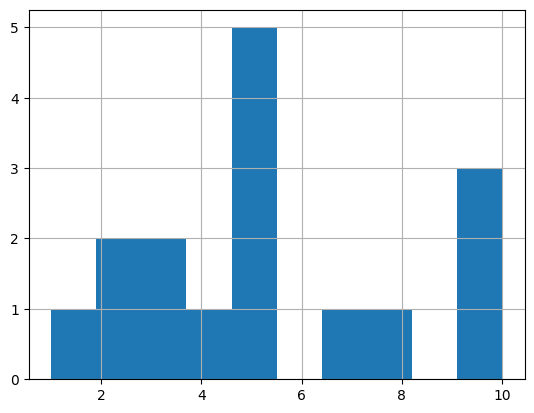

In [90]:
df1.Quantity.hist()
plt.show()

<Axes: xlabel='Region'>

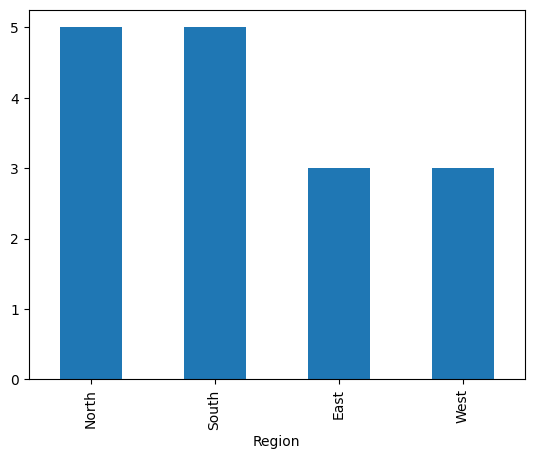

In [84]:
df.Region.value_counts().plot(kind="bar")

*Issue 6:* Fillna in columns **Product Name, Price**

In [91]:
df1

,Order ID,Customer Name,Product Name,Quantity,Price,Date,Region
0,1,John Doe,Widget A,10,15.50,5/1/24,North
1,2,Jane Smith,Widget B,5,20.00,10/1/24,South
2,3,Unknown,Widget A,10,15.50,5/1/24,North
3,4,Alice Johnson,Widget C,5,30.00,15/1/24,East
4,5,Crystal Lin,NaN,3,25.00,20/1/24,West
5,6,Bob Brown,Widget D,1,10.00,25/1/24,South
6,7,Tom White,Widget E,5,40.00,30/1/24,North
7,8,Sarah Green,Widget F,4,NaN,31/1/24,South
8,9,Jim Black,Widget K,2,20.00,28/1/24,East
9,10,Emily Davis,Widget A,7,15.50,29/1/24,West


In [95]:
product_price_dict = df1.dropna(subset=["Product Name", "Price"]).set_index("Product Name")["Price"].to_dict()
product_price_dict

{'Widget A': 15.5,
 'Widget B': 20.0,
 'Widget C': 30.0,
 'Widget D': 10.0,
 'Widget E': 40.0,
 'Widget K': 20.0,
 'Widget H': 12.0,
 'Widget I': 18.0,
 'Widget J': 22.5,
 'Widget L': 25.0,
 'Widget M': 19.99}

In [100]:
product_price_dict.get("Widget F", 20)

20

In [97]:
# Calculate the mean of price 
mean_price = round(df1.Price.mean(),2)
mean_price

np.float64(20.64)

In [98]:
df1

,Order ID,Customer Name,Product Name,Quantity,Price,Date,Region
0,1,John Doe,Widget A,10,15.50,5/1/24,North
1,2,Jane Smith,Widget B,5,20.00,10/1/24,South
2,3,Unknown,Widget A,10,15.50,5/1/24,North
3,4,Alice Johnson,Widget C,5,30.00,15/1/24,East
4,5,Crystal Lin,NaN,3,25.00,20/1/24,West
5,6,Bob Brown,Widget D,1,10.00,25/1/24,South
6,7,Tom White,Widget E,5,40.00,30/1/24,North
7,8,Sarah Green,Widget F,4,NaN,31/1/24,South
8,9,Jim Black,Widget K,2,20.00,28/1/24,East
9,10,Emily Davis,Widget A,7,15.50,29/1/24,West


In [101]:
df1["Price"] = df1.apply(
    lambda row: product_price_dict.get(row["Product Name"], mean_price) if pd.isna(row["Price"]) else row["Price"],
    axis=1
)

In [102]:
df1

,Order ID,Customer Name,Product Name,Quantity,Price,Date,Region
0,1,John Doe,Widget A,10,15.50,5/1/24,North
1,2,Jane Smith,Widget B,5,20.00,10/1/24,South
2,3,Unknown,Widget A,10,15.50,5/1/24,North
3,4,Alice Johnson,Widget C,5,30.00,15/1/24,East
4,5,Crystal Lin,NaN,3,25.00,20/1/24,West
5,6,Bob Brown,Widget D,1,10.00,25/1/24,South
6,7,Tom White,Widget E,5,40.00,30/1/24,North
7,8,Sarah Green,Widget F,4,20.64,31/1/24,South
8,9,Jim Black,Widget K,2,20.00,28/1/24,East
9,10,Emily Davis,Widget A,7,15.50,29/1/24,West


In [103]:
df1.to_csv("Data/pre_processed_data.csv")